# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests
from config import weather_key
from citipy import citipy
import time 
import numpy as np
import random 

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
units ="imperial"

## Generate Cities List

In [3]:
#Generate Longitudes, Latitudes, then Append the city names
for i in range(100):
    Long = round(random.uniform(-180, 180), 2)
    Lat = round(random.uniform(-90, 90), 2)
    city = citipy.nearest_city(Lat, Long).city_name
    if city not in cities:
        cities.append(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Get weather data
counter = 0
name_city = []
longitude = []
latitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:
        query_url = url + "appid=" + weather_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        name_city.append(weather_json['name'])
        longitude.append(weather_json['coord']['lon'])
        latitude.append(weather_json['coord']['lat'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        counter += 1
        print(f'Retrieving {city} data. This is city #{counter}.')
        time.sleep(1)
    except:
        print('Data not found. Move along home.')
        continue

Retrieving faya data. This is #1.
Retrieving ushuaia data. This is #2.
Retrieving krasne data. This is #3.
Retrieving east london data. This is #4.
Woopsie.
Retrieving lompoc data. This is #5.
Retrieving atuona data. This is #6.
Retrieving baherden data. This is #7.
Retrieving maceio data. This is #8.
Retrieving upernavik data. This is #9.
Retrieving ayan data. This is #10.
Retrieving tagusao data. This is #11.
Retrieving bredasdorp data. This is #12.
Retrieving borovoy data. This is #13.
Retrieving pevek data. This is #14.
Retrieving van data. This is #15.
Retrieving pindiga data. This is #16.
Retrieving punta arenas data. This is #17.
Retrieving huilong data. This is #18.
Retrieving victoria data. This is #19.
Retrieving moron data. This is #20.
Retrieving college data. This is #21.
Retrieving san rafael data. This is #22.
Retrieving albany data. This is #23.
Retrieving carnarvon data. This is #24.
Woopsie.
Retrieving sechenovo data. This is #25.
Retrieving bilibino data. This is #26

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
data = {'City Name': name_city, 'Longtitude': longitude, 'Latitude': latitude, 'Temperature (f)':max_temp, 'Humidity':humidity,\
       'Cloudiness': cloudiness, 'Wind Speed (mph)': wind_speed}
data_df = pd.DataFrame(data)

In [22]:
data_df

,City Name,Longtitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
0,Faya,42.45,18.39,66.20,23,0,10.29
1,Ushuaia,-68.30,-54.80,33.80,74,40,25.28
2,Krasne,24.61,49.91,44.60,81,75,8.95
3,East London,27.91,-33.02,64.40,77,20,4.70
4,Lompoc,-120.46,34.64,57.20,93,90,3.36
...,...,...,...,...,...,...,...
69,Saquarema,-42.51,-22.92,68.58,82,98,15.37
70,São João da Barra,-41.05,-21.64,70.56,79,39,11.77
71,Vao,167.48,-22.67,72.00,79,100,16.58
72,Mar del Plata,-57.56,-38.00,62.60,93,90,5.82


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
data_df[data_df['Humidity'] <= 100]

,City Name,Longtitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
0,Faya,42.45,18.39,66.20,23,0,10.29
1,Ushuaia,-68.30,-54.80,33.80,74,40,25.28
2,Krasne,24.61,49.91,44.60,81,75,8.95
3,East London,27.91,-33.02,64.40,77,20,4.70
4,Lompoc,-120.46,34.64,57.20,93,90,3.36
...,...,...,...,...,...,...,...
69,Saquarema,-42.51,-22.92,68.58,82,98,15.37
70,São João da Barra,-41.05,-21.64,70.56,79,39,11.77
71,Vao,167.48,-22.67,72.00,79,100,16.58
72,Mar del Plata,-57.56,-38.00,62.60,93,90,5.82


In [12]:
#  Get the indices of cities that have humidity over 100%.


Series([], Name: Humidity, dtype: bool)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature (f)')

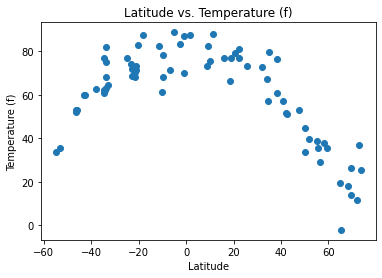

In [20]:
Lattemp = data_df['Latitude']
Templat = data_df['Temperature (f)']
plt.scatter(Lattemp, Templat)
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Latitude vs. Temperature (f)')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

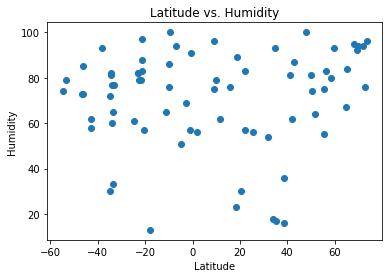

In [15]:
Lathum = data_df['Latitude']
Humlat = data_df['Humidity']
plt.scatter(Lathum, Humlat)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

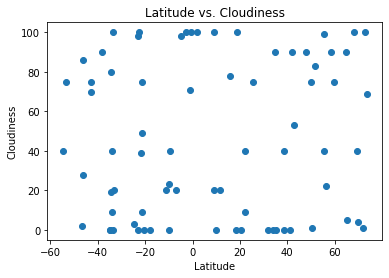

In [16]:
Latcloud = data_df['Latitude']
Cloudlat = data_df['Cloudiness']
plt.scatter(Latcloud, Cloudlat)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

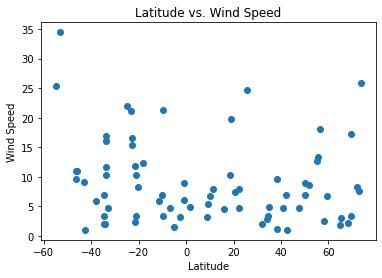

In [17]:
Latwind = data_df['Latitude']
Windlat = data_df['Wind Speed (mph)']
plt.scatter(Latwind, Windlat)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression